<img align="right" width="400" src="https://www.fhnw.ch/de/++theme++web16theme/assets/media/img/fachhochschule-nordwestschweiz-fhnw-logo.svg" alt="FHNW Logo">


# German News Articles - Data inspection and baseline

Reto Steiner


## Links
- [Ten Thousand German News Articles Dataset](https://tblock.github.io/10kGNAD/)



In [3]:
#%%capture

!pip install 'fhnw-nlp-utils>=0.8.0,<0.9.0'
!pip install transformers
from fhnw.nlp.utils.processing import parallelize_dataframe
from fhnw.nlp.utils.processing import is_iterable
from fhnw.nlp.utils.storage import download
from fhnw.nlp.utils.storage import save_dataframe
from fhnw.nlp.utils.storage import load_dataframe
import pandas as pd
import numpy as np
import re
import tqdm
from datetime import datetime
from transformers import AutoTokenizer, TFAutoModel
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import re
tqdm.tqdm.pandas()
sns.set_style('whitegrid')

pd.options.display.max_colwidth = 600
pd.options.display.max_rows = 400


Das System kann die angegebene Datei nicht finden.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Laden der Daten

In [4]:
file = "data/german_news_articles_original_train.parq"
download("https://drive.switch.ch/index.php/s/mRnuzx4BLpMLqyz/download", file)
data_train = load_dataframe(file)

file = "data/german_news_articles_original_test.parq"
download("https://drive.switch.ch/index.php/s/DKUnZraeGp3EIK3/download", file)
data_test = load_dataframe(file)

In [24]:
data_all = pd.concat([data_train, data_test])
data = data_train
Anteil = round((len(data_test)/len(data_all))*100,2)

In [29]:
print(f'Das Trainingsdatenset ist ein DataFrame der Grösse {data_train.shape}')
print(f'Das Testdatenset ist ein DataFrame der Grösse {data_test.shape}')
print(f'Zusammengefügt sind {data_all.shape} wobei der Testdaten Anteil {Anteil}% beträgt,\nfolglich der Trainingsanteil circa 90%')

Das Trainingsdatenset ist ein DataFrame der Grösse (9245, 2)
Das Testdatenset ist ein DataFrame der Grösse (1028, 2)
Zusammengefügt sind (10273, 2) wobei der Testdaten Anteil 10.01% beträgt,
folglich der Trainingsanteil circa 90%


In [30]:
data_train["split"] = "train"
data_test["split"] = "test"

In [31]:
data_train.head(3)

,text_original,label,split
0,"21-Jähriger fällt wohl bis Saisonende aus. Wien – Rapid muss wohl bis Saisonende auf Offensivspieler Thomas Murg verzichten. Der im Winter aus Ried gekommene 21-Jährige erlitt beim 0:4-Heimdebakel gegen Admira Wacker Mödling am Samstag einen Teilriss des Innenbandes im linken Knie, wie eine Magnetresonanz-Untersuchung am Donnerstag ergab. Murg erhielt eine Schiene, muss aber nicht operiert werden. Dennoch steht ihm eine mehrwöchige Pause bevor.",Sport,train
1,"Erfundene Bilder zu Filmen, die als verloren gelten: ""The Forbidden Room"" von Guy Maddin und Evan Johnson ist ein surrealer Ritt durch die magischen Labyrinthe des frühen Kinos. Wien – Die Filmgeschichte ist ein Friedhof der Verlorenen. Unter den Begrabenen finden sich zahllose Filme, von denen nur noch mysteriös oder abenteuerlich klingende Namen kursieren; und solche, über die verstreut herumliegendes Sekundärmaterial Aufschluss erlaubt. Einer davon ist The Forbidden Room, ein Two-Reeler von 1913/14, den der arbeitswütige US-Regisseur Allan Dwan u. a. mit dem Horrordarsteller Lon Chaney ...",Kultur,train
2,"Der frischgekürte CEO Sundar Pichai setzt auf ein umgänglicheres Führungsteam. Die Atmosphäre im Silicon Valley ist rau. Da werden massenhaft Mitarbeiter der direkten Konkurrenz abgeworben, Löhne mit firmenübergreifenden Mauscheleien niedrig gehalten und Untergebene wegen leicht verfehlter Ziele vor die Tür gesetzt. Auch in der höchsten Firmenebene werden brutale Umgangsformen gepflegt: Die Wutausbrüche von Apple-Mitgründer Steve Jobs sind legendär, sein früherer Geschäftspartner Steve Wozniak hätte ihn zu Lebzeiten gerne als Arschloch beschimpft, traute sich aber nicht. Auch Google-Mitgrü...",Web,train


In [32]:
data_test.head(3)

,text_original,label,split
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-Rechner"" und findet, dass die Vertragsform auf die Führungsebene beschränkt gehört. Wien – Die Gewerkschaft GPA-djp sieht Handlungsbedarf bei sogenannten All-in-Verträgen. Für mehr Transparenz haben die Gewerkschaft nun unter www.allinrechner.at ein Online-Werkzeug lanciert, das Arbeitnehmern mit solchen Verträgen helfen soll, sich einen Überblick zu verschaffen. Es geht darum, ob die Differenz zum Grundgehalt nicht womöglich eine zu geringe ist. Schließlich sei ein All-in-Gehalt oft nur auf den ersten Blick von Vorteil, gab GPA-djp-Chef Wolfga...",Wirtschaft,test
1,"Franzosen verteidigen 2:1-Führung – Kritische Stimmen zu Schwedens Superstar, Tore in K.-o.-Phase fehlen – Benfica mit Abwehrsorgen nach St. Petersburg. London – Mit einem trügerischen Vorsprung im Gepäck ist Paris Saint Germain zum Champions-League-Achtelfinale nach London gereist. Am Mittwochabend (20.45 Uhr) verteidigt Frankreichs Serienmeister gegen Chelsea ein 2:1 aus dem Hinspiel. PSG sollte gewarnt sein, die Blues sind seit der Trennung von Jose Mourinho erstarkt. Seit Dezember hat Chelsea unter Guus Hiddink in 18 Pflichtspielen nur die eine Niederlage in Paris einstecken müssen. Ei...",Sport,test
2,"Neues Video von Designern macht im Netz die Runde – sie schlagen etwa bunte Benachrichtigungen vor. Bei den iPhone-Verkaufszahlen ist der Wurm drin: Erstmals seit dessen Einführung musste Apple heuer sinkende Quartalsergebnisse bekanntgeben. CEO Tim Cook hat daher versprochen, das im Herbst erscheinende iPhone 7 werde Dinge können, die viele Menschen zu einer Kaufentscheidungen bewegen wird. Ein großer Bestandteil davon ist nicht nur die Hardware, sondern auch das Betriebssystem iOS. Dessen neueste Versionsnummer 10 könnte im Juni bei Apples WWDC-Event präsentiert werden. Noch ist nur weni...",Web,test


In [8]:
data.head(3)

,text_original,label,split
0,"21-Jähriger fällt wohl bis Saisonende aus. Wien – Rapid muss wohl bis Saisonende auf Offensivspieler Thomas Murg verzichten. Der im Winter aus Ried gekommene 21-Jährige erlitt beim 0:4-Heimdebakel gegen Admira Wacker Mödling am Samstag einen Teilriss des Innenbandes im linken Knie, wie eine Magnetresonanz-Untersuchung am Donnerstag ergab. Murg erhielt eine Schiene, muss aber nicht operiert werden. Dennoch steht ihm eine mehrwöchige Pause bevor.",Sport,train
1,"Erfundene Bilder zu Filmen, die als verloren gelten: ""The Forbidden Room"" von Guy Maddin und Evan Johnson ist ein surrealer Ritt durch die magischen Labyrinthe des frühen Kinos. Wien – Die Filmgeschichte ist ein Friedhof der Verlorenen. Unter den Begrabenen finden sich zahllose Filme, von denen nur noch mysteriös oder abenteuerlich klingende Namen kursieren; und solche, über die verstreut herumliegendes Sekundärmaterial Aufschluss erlaubt. Einer davon ist The Forbidden Room, ein Two-Reeler von 1913/14, den der arbeitswütige US-Regisseur Allan Dwan u. a. mit dem Horrordarsteller Lon Chaney ...",Kultur,train
2,"Der frischgekürte CEO Sundar Pichai setzt auf ein umgänglicheres Führungsteam. Die Atmosphäre im Silicon Valley ist rau. Da werden massenhaft Mitarbeiter der direkten Konkurrenz abgeworben, Löhne mit firmenübergreifenden Mauscheleien niedrig gehalten und Untergebene wegen leicht verfehlter Ziele vor die Tür gesetzt. Auch in der höchsten Firmenebene werden brutale Umgangsformen gepflegt: Die Wutausbrüche von Apple-Mitgründer Steve Jobs sind legendär, sein früherer Geschäftspartner Steve Wozniak hätte ihn zu Lebzeiten gerne als Arschloch beschimpft, traute sich aber nicht. Auch Google-Mitgrü...",Web,train


In [62]:
mittelwert = round(data_all['text_original'].str.len().mean(),1)
median = round(data_all['text_original'].str.len().median(),0)
max = round(data_all['text_original'].str.len().max(),1)
min = round(data_all['text_original'].str.len().min(),1)
print(f'Der Mittelwert der Zeichen aller Artikel ist {mittelwert} und der Median {median}\nDie minimale Länge ist {min} und die maximale Länge ist {max} Zeichen')

Der Mittelwert der Zeichen aller Artikel ist 2591.6 und der Median 2158.0
Die minimale Länge ist 25 und die maximale Länge ist 32600 Zeichen


Folgend sind die Histogramme gezeigt

<AxesSubplot: ylabel='Frequency'>

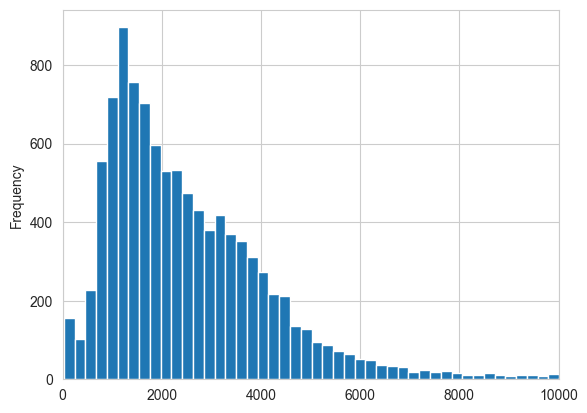

In [52]:
data_all['text_original'].str.len().plot(kind = 'hist', bins = 150, xlim = (0,10000))
#print(len(data_all))


<AxesSubplot: >

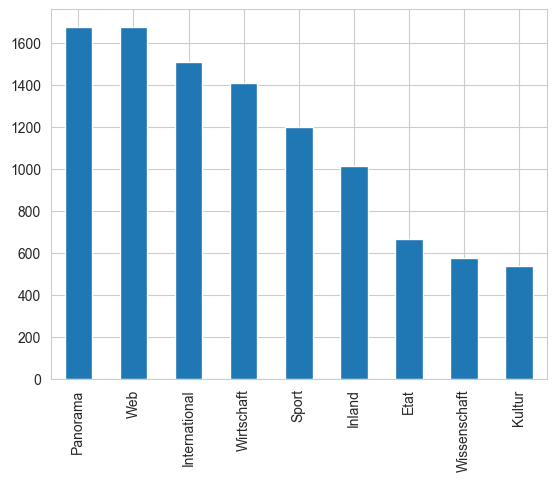

In [34]:
data_all['label'].value_counts().plot(kind = 'bar')

In [11]:
for col in data_all.columns:
    print(f"Missing data for column [{col}]: {data_all[col].isnull().sum()}")

Missing data for column [text_original]: 0
Missing data for column [label]: 0
Missing data for column [split]: 0


In [12]:
df_all = data_all["label"].value_counts().sort_index()
df_train = data_train["label"].value_counts().sort_index()
df_test = data_test["label"].value_counts().sort_index()
df = pd.concat([df_all.to_frame(), df_train.to_frame(), df_test.to_frame()], axis=1)#, keys=["all","train","test"])
df.columns=["all","train","test"]
print (df)

                all  train  test
Etat            668    601    67
Inland         1015    913   102
International  1511   1360   151
Kultur          539    485    54
Panorama       1678   1510   168
Sport          1201   1081   120
Web            1677   1509   168
Wirtschaft     1411   1270   141
Wissenschaft    573    516    57


## Fazit
Die neun Klassen sind einwenig unausgeglichen, jedoch habe ich das Gefühl das dies noch im Bereich des möglichen liegt. Bei der Basline ein SMOTE ausprobieren um zu sehen ob dies Einen Signifikanten einfluss hat.